# EDA and ML on Toronto Airbnb Data

Authors - Aniruddha Shinde, Samarth Singhania

**(Question 1)**: *Can we predict whether a host is a superhost using the features present in the Airbnb dataset?*    
**Date**: 6/18/2021

**Introduction**

- Airbnb superhost is the badge of honour for the hosts who meet specific criteria. In short, it is like a reward for the top hosts to differentiate them from less successful ones.

- It is a visual symbol of trust and credibility.

*Business Motivation for Hosts:*
- Customers are more likely to trust superhosts and their listings will appear higher in the search on Airbnb.

- Their listings will be featured in emails and search results which will result in more bookings and revenue.

- Extra rewards and referral bonuses are awarded to superhosts.

- Superhosts are given priority by Airbnb customer support in case of any queries or problems.

*Business Motivation for Airbnb:*

- Airbnb can better allocate their resources like time, money and people in formulating strategies and advertising campaigns for hosts who will be superhosts.

- All of the above benefits would likely result in more revenue and profit for Airbnb.

In [1]:
# Import required packages and load data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import statistics as st

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import warnings 

warnings.filterwarnings('ignore')

df = pd.read_csv('/content/Airbnb_data.csv', parse_dates = ['host_since'])
pd.set_option('display.max_columns', None)

In [2]:
# Looking at the first 10 records 

df.head(10)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20200909043044,2020-09-09,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Vancouver, British Columbia, Canada","I live in Vancouver, Canada with my husband an...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aeea...,https://a0.muscache.com/im/pictures/user/7aeea...,Commercial Drive,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Toronto, Ontario, Canada",Little Portugal,NaN,43.64617,-79.42451,Entire house,Entire home/apt,10,NaN,3 baths,5.0,7.0,"[""Shampoo"", ""TV"", ""Dryer"", ""Indoor fireplace"",...",$469.00,4,730,4,4,730,730,4.0,730.0,NaN,t,0,0,0,0,2020-09-09,7,0,0,2015-07-19,2017-12-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.11
1,8077,https://www.airbnb.com/rooms/8077,20200909043044,2020-09-10,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Ontario, Canada",My husband and I have been airbnb host for alm...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,Harbourfront,2.0,2.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,Waterfront Communities-The Island,NaN,43.64105,-79.37628,Private room in apartment,Private room,2,NaN,1.5 baths,1.0,1.0,"[""Shampoo"", ""TV"", ""Pool"", ""Gym"", ""Free parking...",$99.00,180,365,180,180,365,365,180.0,365.0,NaN,t,30,60,90,365,2020-09-10,169,0,0,2009-08-20,2013-08-27,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,2,1,1,0,1.25
2,12604,https://www.airbnb.com/rooms/12604,20200909043044,2020-09-09,Seaton Village Parlour Bedroom,Comfortable sofa bed in airy main floor parlou...,NaN,https://a0.muscache.com/pictures/5282025/91fca...,48239,https://www.airbnb.com/users/show/48239,Rona,2009-10-25,"Toronto, Ontario, Canada","I love travelling and exploring new places, ma...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/48239/profile...,https://a0.muscache.com/im/users/48239/profile...,The Annex,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,NaN,Annex,NaN,43.66724,-79.41598,Private room in house,Private room,1,NaN,1.5 baths,1.0,1.0,"[""Indoor fireplace"", ""Wifi""]",$66.00,1,10,1,1,10,10,1.0,10.0,NaN,t,0,0,0,0,2020-09-09,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,23691,https://www.airbnb.com/rooms/23691,20200909043044,2020-09-10,Queen Bedroom close to downtown,<b

In [3]:
# Dataset columns and other information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19343 entries, 0 to 19342
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            19343 non-null  int64         
 1   listing_url                                   19343 non-null  object        
 2   scrape_id                                     19343 non-null  int64         
 3   last_scraped                                  19343 non-null  object        
 4   name                                          19342 non-null  object        
 5   description                                   18623 non-null  object        
 6   neighborhood_overview                         12364 non-null  object        
 7   picture_url                                   19343 non-null  object        
 8   host_id                                       19343 non-null  int6

**Data Cleaning and EDA**

In [4]:
# Finding out how many hosts are present in the data

df.host_id.nunique()

12837

The dataset has information about 12,837 hosts and their listsings.

We dropped columns that we don't believe will have any predictive power. 
- Columns that are URLs or other string: listing_url, picture_url, name, description, bathrooms, property_type, room_type, host_url, host_name, host_about, host_location and many others listed below;  all of which would not have contributed to the prediction model.
- Also a few of the columns, including host_neighbourhood, neighbourhood and neighbourhood_cleansed have a lot of different values and string data which would result in high dimensionality or too many features. 
- A few of the columns, including host_response_rate and host_acceptance_rate have a very large number of missing values, and we do not feel that we had enough information available to impute the missing values accurately.
- We also decided to drop some of the datetime columns, including first_review, last_scraped,  and last_review because there are a very large number of unique values in these columns, and we believe that they would not have any prediction power.



In [5]:
df_1 = df.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview',
                'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated', 'property_type', 'room_type', 'accommodates',
                'license', 'picture_url', 'host_url', 'host_name', 'host_about', 'host_location', 'host_neighbourhood',
                'host_thumbnail_url', 'host_picture_url', 'host_listings_count', 'host_verifications', 'host_has_profile_pic',
                'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude', 'has_availability', 'calendar_last_scraped', 
                'number_of_reviews_l30d', 'bathrooms', 'bathrooms_text', 'host_identity_verified', 'number_of_reviews',
                'first_review', 'last_review', 'calculated_host_listings_count', 'bedrooms', 'beds', 'amenities', 'price', 
                'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'maximum_nights', 
                'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 
                'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',  'calculated_host_listings_count_private_rooms', 
                'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_shared_rooms', 'host_response_rate',
                'host_acceptance_rate', 'reviews_per_month', 'host_since'], axis = 1)

df_1

,host_id,host_response_time,host_is_superhost,host_total_listings_count,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,1565,NaN,f,1.0,4,0,0,0,0,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,22795,NaN,f,2.0,180,30,60,90,365,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,t
2,48239,NaN,f,1.0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
3,93825,NaN,f,2.0,1,0,0,0,209,6,95.0,10.0,10.0,10.0,10.0,9.0,10.0,t
4,113345,within a few hours,f,7.0,21,23,23,23,216,2,95.0,10.0,10.0,9.0,9.0,10.0,9.0,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19338,342316738,within a few hours,t,20.0,30,24,54,84,264,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t
19339,342346982,within a day,f,0.0,1,30,60,90,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
19340,342346982,within a day,f,0.0,1,29,59,89,364,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
19341,342346982,within a day,f,0.0,1,30,60,90,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f


**Dealing with missing values**

In [6]:
# This function calculates the proportion of null values per column with respect to the dataset

def null_values_stats(df):
    null_stats = df.isnull().sum().to_frame()
    null_stats.columns = ['null_val_count']
    null_stats['null_val_percent'] = np.round(100 * (null_stats['null_val_count'] / df.shape[0]))
    null_stats.sort_values(by='null_val_count', ascending=False, inplace=True)

    return null_stats

In [7]:
missing_vals = null_values_stats(df_1)
missing_vals

,null_val_count,null_val_percent
host_response_time,7529,39.0
review_scores_location,4372,23.0
review_scores_value,4371,23.0
review_scores_checkin,4369,23.0
review_scores_accuracy,4367,23.0
review_scores_cleanliness,4367,23.0
review_scores_communication,4365,23.0
review_scores_rating,4333,22.0
host_is_superhost,4,0.0
host_total_listings_count,4,0.0


We have a lot of missing values in few columns but removing them would result in small number of data points. Therefore, we keep them and fill them with relevant values.

In [8]:
# Converting host_is_superhost and instant_bookable column to binary

df_1['host_is_superhost'] = np.where(df_1['host_is_superhost']=='t', 1, 0)
df_1['instant_bookable'] = np.where(df_1['instant_bookable']=='t', 1, 0)

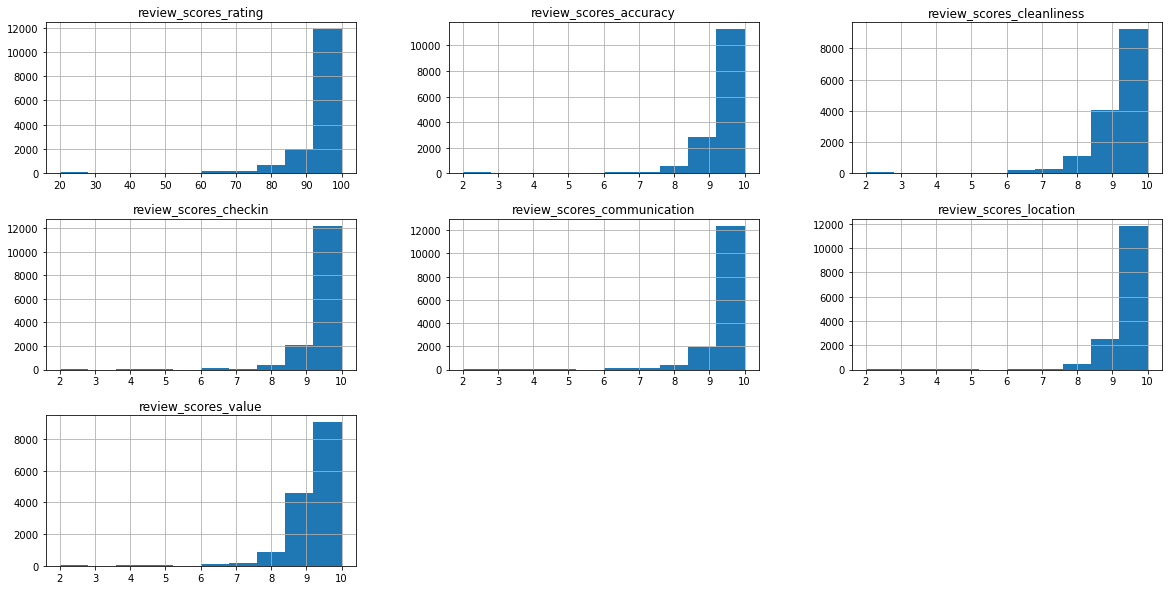

In [21]:
plt.rcParams["figure.figsize"] = (20,10)
df.hist(column=['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 
                'review_scores_location', 'review_scores_value']);

From the above distribution plots of various review columns in our data, we can observe that the data is left skewed. Thus, we decide to impute the missing values with median.

In [ ]:
#Calculating median for the review columns with missing values

median_rating= df['review_scores_rating'].median()
median_accuracy= df['review_scores_accuracy'].median()
median_clean= df['review_scores_cleanliness'].median()
median_checkin= df['review_scores_checkin'].median()
median_communication= df['review_scores_communication'].median()
median_location= df['review_scores_location'].median()
median_value= df['review_scores_value'].median()

# Filling null values with median of values in the same column

df_1['review_scores_rating'].fillna(value=median_rating, inplace=True)
df_1['review_scores_accuracy'].fillna(value=median_accuracy, inplace=True)
df_1['review_scores_cleanliness'].fillna(value=median_clean, inplace=True)
df_1['review_scores_checkin'].fillna(value=median_checkin, inplace=True)
df_1['review_scores_communication'].fillna(value=median_communication, inplace=True)
df_1['review_scores_location'].fillna(value=median_location, inplace=True)
df_1['review_scores_value'].fillna(value=median_value, inplace=True)

# Changing the base of review socre rating to match the 0-10 scale of other columns

df_1['review_scores_rating'] = df_1['review_scores_rating']/10
df_1[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'instant_bookable',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].astype(int)

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,instant_bookable,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,10,10,10,0,10,10,10,10
1,9,10,10,1,10,10,10,10
2,9,10,10,0,10,10,10,10
3,9,10,10,1,10,10,9,10
4,9,10,10,1,9,9,10,9
...,...,...,...,...,...,...,...,...
19338,9,10,10,1,10,10,10,10
19339,9,10,10,0,10,10,10,10
19340,9,10,10,0,10,10,10,10
19341,9,10,10,0,10,10,10,10


In [ ]:
# Filling host total listing count NaN values by counting those host ids in the dataset

df_1.at[1420, 'host_total_listings_count'] = (df['host_id']==31675651).sum()
df_1.at[5225, 'host_total_listings_count'] = (df['host_id']==75779190).sum()
df_1.at[9326, 'host_total_listings_count'] = (df['host_id']==201103629).sum()
df_1.at[18307, 'host_total_listings_count'] = (df['host_id']==118516038).sum()

In [ ]:
# Finding mode of host_response_time column to fill null

mode_res_time = df_1['host_response_time'].value_counts()
mode_res_time

within an hour        6891
within a few hours    2616
within a day          1549
a few days or more     758
Name: host_response_time, dtype: int64

In [ ]:
# Filling null values with mode of values in the same column

df_1['host_response_time'].fillna(value='within an hour', inplace=True)
df_1

,host_id,host_response_time,host_is_superhost,host_total_listings_count,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,1565,within an hour,0,1.0,4,0,0,0,0,0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0
1,22795,within an hour,0,2.0,180,30,60,90,365,0,9.7,10.0,10.0,10.0,10.0,10.0,10.0,1
2,48239,within an hour,0,1.0,1,0,0,0,0,0,9.7,10.0,10.0,10.0,10.0,10.0,10.0,0
3,93825,within an hour,0,2.0,1,0,0,0,209,6,9.5,10.0,10.0,10.0,10.0,9.0,10.0,1
4,113345,within a few hours,0,7.0,21,23,23,23,216,2,9.5,10.0,10.0,9.0,9.0,10.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19338,342316738,within a few hours,1,20.0,30,24,54,84,264,0,9.7,10.0,10.0,10.0,10.0,10.0,10.0,1
19339,342346982,within a day,0,0.0,1,30,60,90,365,0,9.7,10.0,10.0,10.0,10.0,10.0,10.0,0
19340,342346982,within a day,0,0.0,1,29,59,89,364,0,9.7,10.0,10.0,10.0,10.0,10.0,10.0,0
19341,342346982,within a day,0,0.0,1,30,60,90,365,0,9.7,10.0,10.0,10.0,10.0,10.0,10.0,0


Below we are converting response_time to integer. The intuition behind it is to assign a higher number to the host who replies fast.

In [ ]:
# Converting response_time column to intger
def fillResRate(rate):
    if rate == 'within an hour':
        return 3
    elif rate == 'within a few hours':
        return 2
    elif rate == 'within a day':
        return 1
    else:
        return 0

df_1['host_response_time'] = df_1['host_response_time'].apply(fillResRate)
df_1

,host_id,host_response_time,host_is_superhost,host_total_listings_count,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,1565,3,0,1.0,4,0,0,0,0,0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0
1,22795,3,0,2.0,180,30,60,90,365,0,9.7,10.0,10.0,10.0,10.0,10.0,10.0,1
2,48239,3,0,1.0,1,0,0,0,0,0,9.7,10.0,10.0,10.0,10.0,10.0,10.0,0
3,93825,3,0,2.0,1,0,0,0,209,6,9.5,10.0,10.0,10.0,10.0,9.0,10.0,1
4,113345,2,0,7.0,21,23,23,23,216,2,9.5,10.0,10.0,9.0,9.0,10.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19338,342316738,2,1,20.0,30,24,54,84,264,0,9.7,10.0,10.0,10.0,10.0,10.0,10.0,1
19339,342346982,1,0,0.0,1,30,60,90,365,0,9.7,10.0,10.0,10.0,10.0,10.0,10.0,0
19340,342346982,1,0,0.0,1,29,59,89,364,0,9.7,10.0,10.0,10.0,10.0,10.0,10.0,0
19341,342346982,1,0,0.0,1,30,60,90,365,0,9.7,10.0,10.0,10.0,10.0,10.0,10.0,0


We group by host_id and take the mean of all numerical features to get a new dataset in which each record belongs to one host.

In [ ]:
q1 = df_1.copy(deep = True)
q1 = q1.groupby(['host_id']).agg('mean')
q1

,host_response_time,host_is_superhost,host_total_listings_count,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
host_id,,,,,,,,,,,,,,,,,
1565,3.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,10.00,10.0,10.0,10.0,10.0,10.0,10.0,0.0
8954,3.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,9.70,10.0,10.0,10.0,10.0,10.0,10.0,0.0
14135,3.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,10.00,10.0,10.0,10.0,10.0,10.0,10.0,0.0
14282,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,9.60,9.5,10.0,10.0,10.0,10.0,9.5,0.0
22795,3.0,0.0,2.0,180.0,30.0,60.0,90.0,365.0,0.0,9.85,10.0,10.0,10.0,10.0,10.0,10.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366089208,3.0,0.0,1.0,2.0,25.0,55.0,85.0,360.0,0.0,9.70,10.0,10.0,10.0,10.0,10.0,10.0,1.0
366105918,3.0,0.0,0.0,1.0,28.4,58.2,88.2,253.2,0.0,9.70,10.0,10.0,10.0,10.0,10.0,10.0,1.0
366270532,3.0,0.0,2.0,1.0,30.0,60.0,90.0,365.0,0.0,9.70,10.0,10.0,10.0,10.0,10.0,10.0,1.0


We check the proportion of superhosts and regular hosts to see if there is imbalance in the data.

In [ ]:
q1.host_is_superhost.value_counts()

0.0    9487
1.0    3350
Name: host_is_superhost, dtype: int64

The dataset is imbalanced; number of regular hosts is almost thrice that of superhosts.

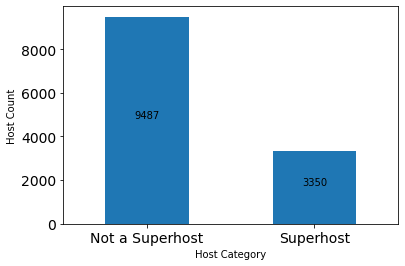

In [ ]:
hosts = q1.host_is_superhost.value_counts().plot(kind = 'bar', xlabel = 'Host Category', ylabel = 'Host Count', fontsize = 14)
hosts.set_xticklabels(['Not a Superhost', 'Superhost'], rotation = 0)
for rect in hosts.patches:
    height = rect.get_height()
    ypos = rect.get_y() + height/2
    hosts.text(rect.get_x() + rect.get_width()/2., ypos,
            '%d' % int(height), ha='center', va='bottom');

# **Creation of Classification Models**

In [ ]:
# features matrix
X = q1.drop('host_is_superhost', axis = 1)

# target vector
y = q1['host_is_superhost']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20,10)

**Logistic Regression**

In [ ]:
# Model creation and prediction

lrmodel = LogisticRegression()
lrmodel.fit(Xtrain, ytrain)
ylr_pred = lrmodel.predict(Xtest) 

In [ ]:
# Generation of confusion matrix

TP, FN, FP, TN = confusion_matrix(ytest, ylr_pred).reshape(-1)
TP, FN, FP, TN

(1823, 94, 389, 262)

In [ ]:
# Accuracy of Logistic Regression

accuracy_score(ytest, ylr_pred)

0.8119158878504673

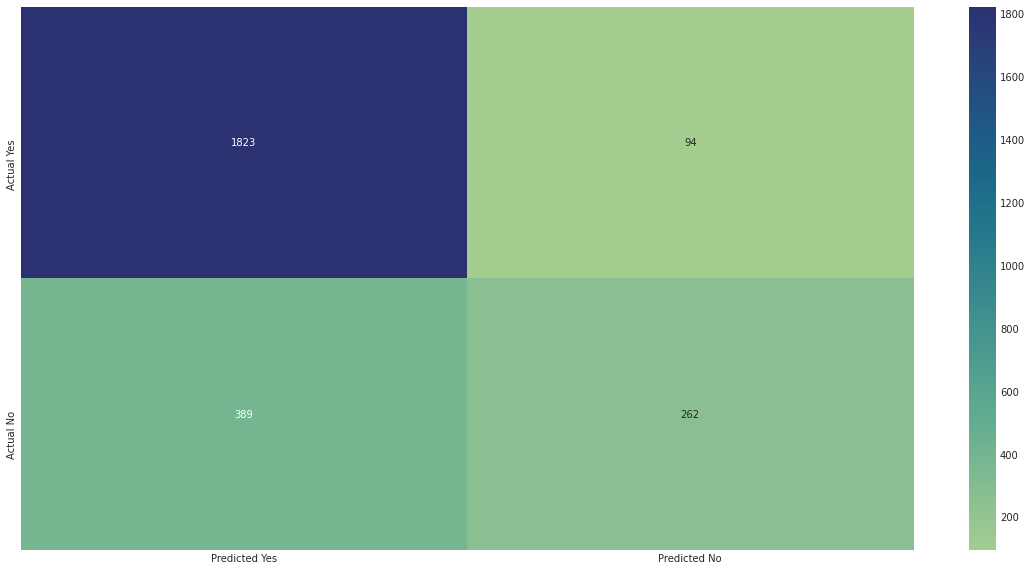

In [ ]:
# Visualising confusion matrix in the form of a heat map

data=[[TP, FN], [FP, TN]]
heatmap_data = pd.DataFrame(data)
heatmap_data.columns = ['Predicted Yes', 'Predicted No']
heatmap_data.index = ['Actual Yes', 'Actual No']
sns.heatmap(heatmap_data, annot=True, cmap="crest", fmt='d')
sns.set(font_scale = 2.4)

**K - Nearest Neighbors**

0.7901090342679128


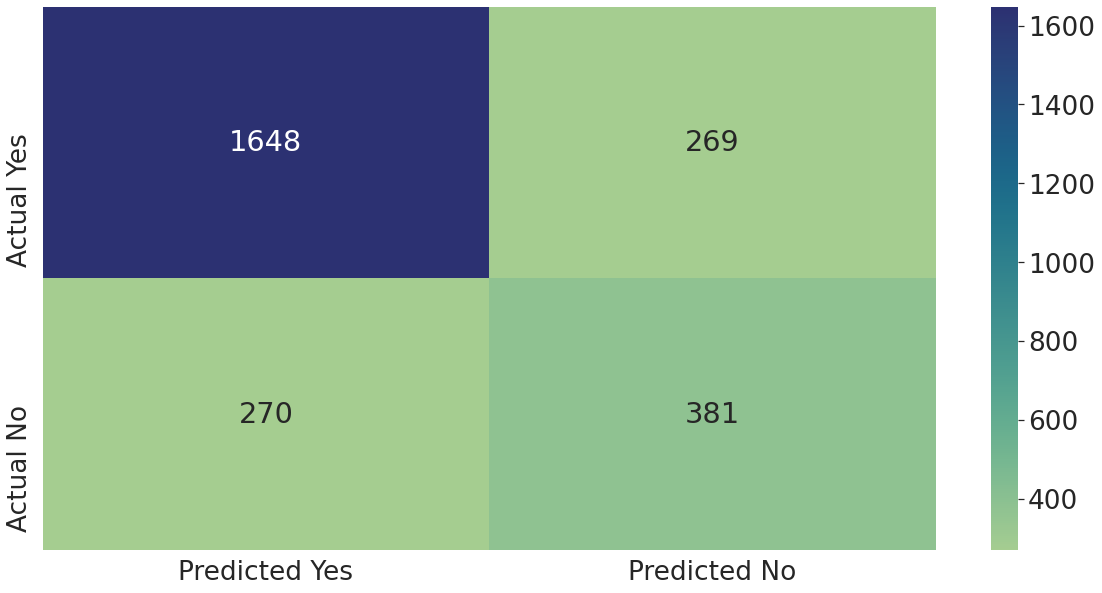

In [ ]:
# KNN model creation and prediction

knnmodel = KNeighborsClassifier(n_neighbors=5)
knnmodel.fit(Xtrain, ytrain)
yknn_pred = knnmodel.predict(Xtest)

# Getting accuracy & generation and visualisation of confusion matrix

TP, FN, FP, TN = confusion_matrix(ytest, yknn_pred).reshape(-1)

print(accuracy_score(ytest, yknn_pred))

data=[[TP, FN], [FP, TN]]
heatmap_data = pd.DataFrame(data)
heatmap_data.columns = ['Predicted Yes', 'Predicted No']
heatmap_data.index = ['Actual Yes', 'Actual No']
sns.heatmap(heatmap_data, annot=True, cmap="crest", fmt='d')

**Decision Trees**

0.8356697819314641


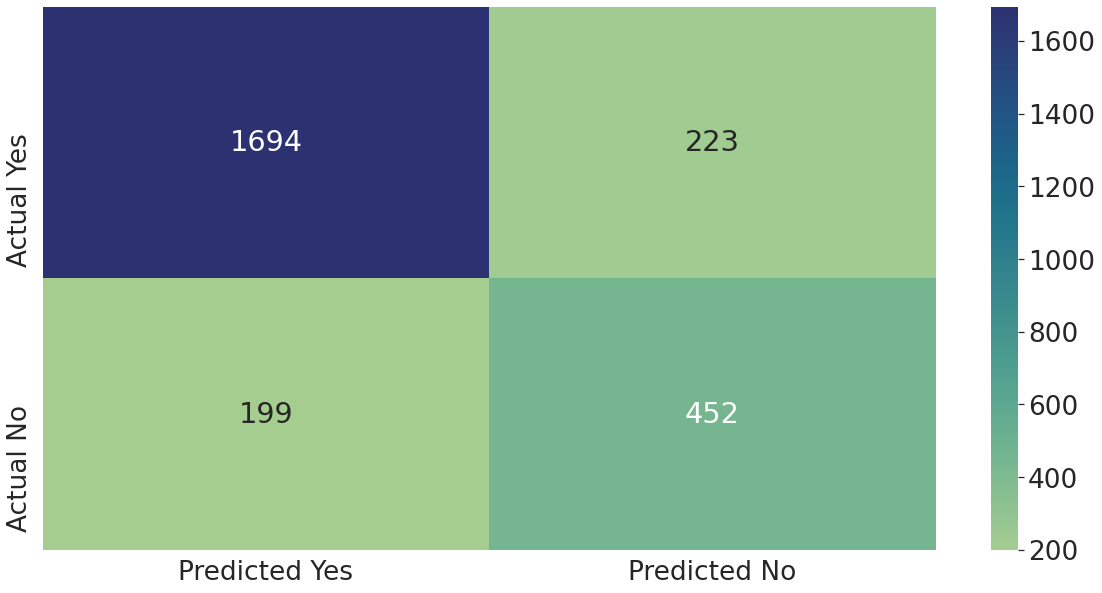

In [ ]:
# DT model creation and prediction

dtmodel = DecisionTreeClassifier()
dtmodel.fit(Xtrain, ytrain)
ydt_pred = dtmodel.predict(Xtest)

# Getting accuracy & generation and visualisation of confusion matrix

TP, FN, FP, TN = confusion_matrix(ytest, ydt_pred).reshape(-1)

print(accuracy_score(ytest, ydt_pred))

data=[[TP, FN], [FP, TN]]
heatmap_data = pd.DataFrame(data)
heatmap_data.columns = ['Predicted Yes', 'Predicted No']
heatmap_data.index = ['Actual Yes', 'Actual No']
sns.heatmap(heatmap_data, annot=True, cmap="crest", fmt='d')

**Support Vector Machines**

0.8052959501557633


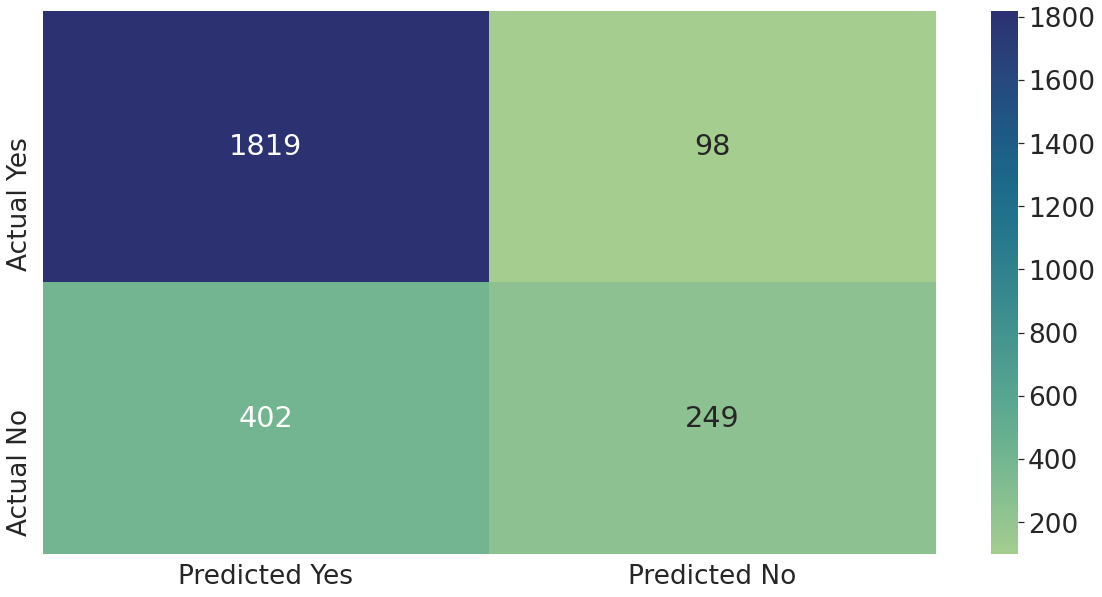

In [ ]:
# SVC model creation and prediction

svcmodel = SVC(probability=True)
svcmodel.fit(Xtrain, ytrain)
ysvc_pred = svcmodel.predict(Xtest)

# Getting accuracy & generation and visualisation of confusion matrix

TP, FN, FP, TN = confusion_matrix(ytest, ysvc_pred).reshape(-1)

print(accuracy_score(ytest, ysvc_pred))

data=[[TP, FN], [FP, TN]]
heatmap_data = pd.DataFrame(data)
heatmap_data.columns = ['Predicted Yes', 'Predicted No']
heatmap_data.index = ['Actual Yes', 'Actual No']
sns.heatmap(heatmap_data, annot=True, cmap="crest", fmt='d')

Previously, we had selected features based on our intuition and used it for predicting superhosts using several classifiers.

Now, we will use Random Forest Classifier to select important features and run the same classfiers to see if we get better results.

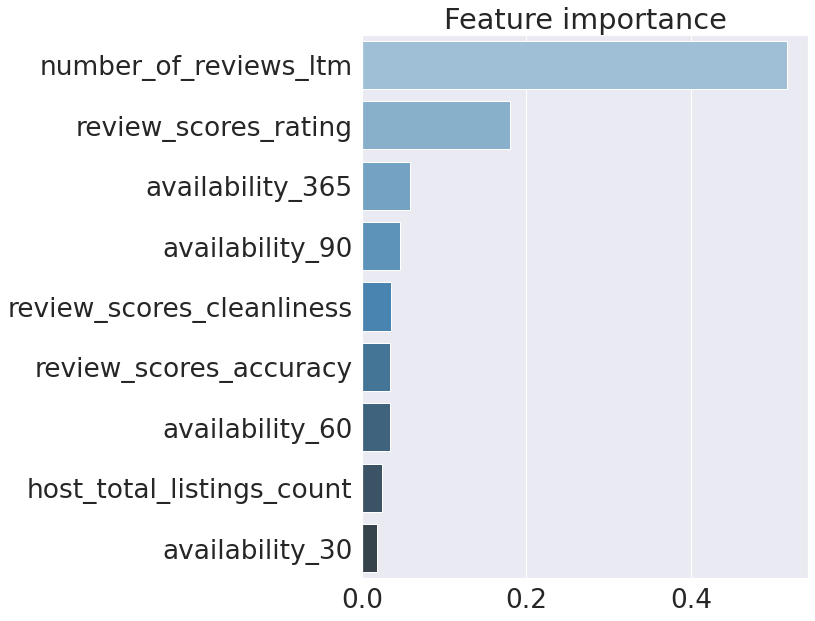

In [ ]:
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 5}

# Drop redundant columns (for features with two unique values)
drop = ['host_is_superhost']
x, y = q1.drop(drop,axis=1), q1['host_is_superhost']

# Fit RandomForest Classifier

clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)

# Plot features importances

imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(8,10))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index[:9], x=imp.values[:9], palette="Blues_d", orient='h')

Most of the above features are review related. This aligns with Airbnb's one of the official rules to be a superhost - have high ratings and excellent reviews.

We now use the above features suggested by Random Forrest Classfier to see if there is any improvement in accuracy for identifying a host as a superhost/non - superhost.

In [ ]:
q2 = q1[['number_of_reviews_ltm', 'review_scores_rating', 'availability_365', 'availability_90', 'availability_30',
         'availability_60', 'review_scores_accuracy', 'review_scores_cleanliness', 'host_total_listings_count', 'host_is_superhost']]

In [ ]:
# features matrix

X2 = q2.drop('host_is_superhost', axis = 1)

# target vector

y2 = q2['host_is_superhost']

Xtrain, Xtest, ytrain, ytest = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [ ]:
# Logistic Regression (important features)

lrmodel = LogisticRegression()
lrmodel.fit(Xtrain, ytrain)
ylr_pred = lrmodel.predict(Xtest)

accuracy_score(ytest, ylr_pred)

0.8045171339563862

In [ ]:
# KNN (important features)

knnmodel = KNeighborsClassifier(n_neighbors=5)
knnmodel.fit(Xtrain, ytrain)
yknn_pred = knnmodel.predict(Xtest
                             )
accuracy_score(ytest, yknn_pred)

0.8021806853582555

In [ ]:
# DT (important features)

dtmodel = DecisionTreeClassifier()
dtmodel.fit(Xtrain, ytrain)
ydt_pred = dtmodel.predict(Xtest)

accuracy_score(ytest, ydt_pred)

0.8415109034267912

In [ ]:
# SVC (important features)

svcmodel = SVC(probability = True)
svcmodel.fit(Xtrain, ytrain)
ysvc_pred = svcmodel.predict(Xtest)

accuracy_score(ytest, ysvc_pred)

0.8064641744548287

*Comparison of accuracy for classification between models generated using important features suggested by random forest classifier and models generated using all features:*

- Logistic Regression -> **80.45%** [using important Features] & **81.19%** [using all features]
- KNN -> **80.21%** [using important Features] & **79.01%** [using all features]
- Decision Trees -> **84.19%** [using important Features] & **83.64%** [using all features]
- SVC -> **80.64%** [using important Features] & **80.52%** [using all features]

**Plotting AUC/ROC Curve for data with features suggested by Random Forrest Classifier.** 
- ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.



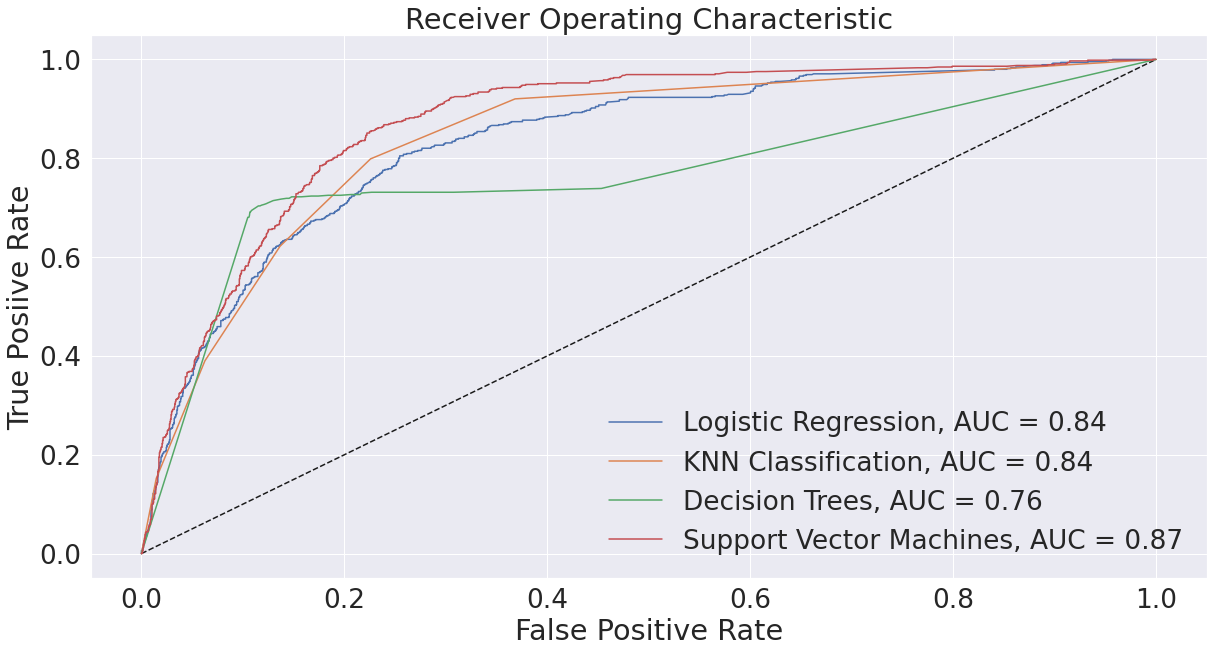

In [ ]:
y_pred_prob1 = lrmodel.predict_proba(Xtest)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(ytest, y_pred_prob1)
auc1 = roc_auc_score(ytest, y_pred_prob1)

y_pred_prob3 = knnmodel.predict_proba(Xtest)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(ytest, y_pred_prob3)
auc3 = roc_auc_score(ytest, y_pred_prob3)

y_pred_prob4 = dtmodel.predict_proba(Xtest)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(ytest, y_pred_prob4)
auc4 = roc_auc_score(ytest, y_pred_prob4)

y_pred_prob5 = svcmodel.predict_proba(Xtest)[:,1]
fpr5 , tpr5, thresholds5 = roc_curve(ytest, y_pred_prob5)
auc5 = roc_auc_score(ytest, y_pred_prob5)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Logistic Regression, AUC = %.2f" % auc1)
plt.plot(fpr3, tpr3, label= "KNN Classification, AUC = %.2f" % auc3)
plt.plot(fpr4, tpr4, label= "Decision Trees, AUC = %.2f" % auc4)
plt.plot(fpr5, tpr5, label= "Support Vector Machines, AUC = %.2f" % auc5)
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Posiive Rate")
plt.title('Receiver Operating Characteristic')
plt.show()

- According to AUC ROC Curve, SVC model has performed the best on test/unseen data with AUC = 0.87.
- Here ROC curve may have presented an overly optimistic view of algorithms' performance because there is an imbalance in our data as we saw before where number of regular hosts (class 0 ) are thrice that of superhosts (class 1).
- The main reason for this optimistic picture is because of the use of true negatives in the False Positive Rate in the ROC Curve.
- The presence of large number of regular hosts (class 0) examples means we are less interested in the skill of the model at predicting class 0 correctly, example high true negatives.

- To overcome this issue, we will be reviewing the precision - recall curve. Key to the calculation of precision and recall is that the calculations do not make use of true negatives. It is only concerned with the correct prediction of the minority class, class 1.

Plotting Precision-Recall Curve for data with features suggested by Random Forest Classifier

*We have also calculated composite scores that attempt to summarize precision and recall:*
- F1 Score -> Calculates the harmonic mean of precision and recall.
- Area Under Curve (AUC) -> Summarizes the integral or an approximation of the area under the precision-recall curve.

Logistic Regression: f1=0.50 auc=0.62
KNN Classifier: f1=0.61 auc=0.65
Decision Trees: f1=0.69 auc=0.69
SVC: f1=0.51 auc=0.66


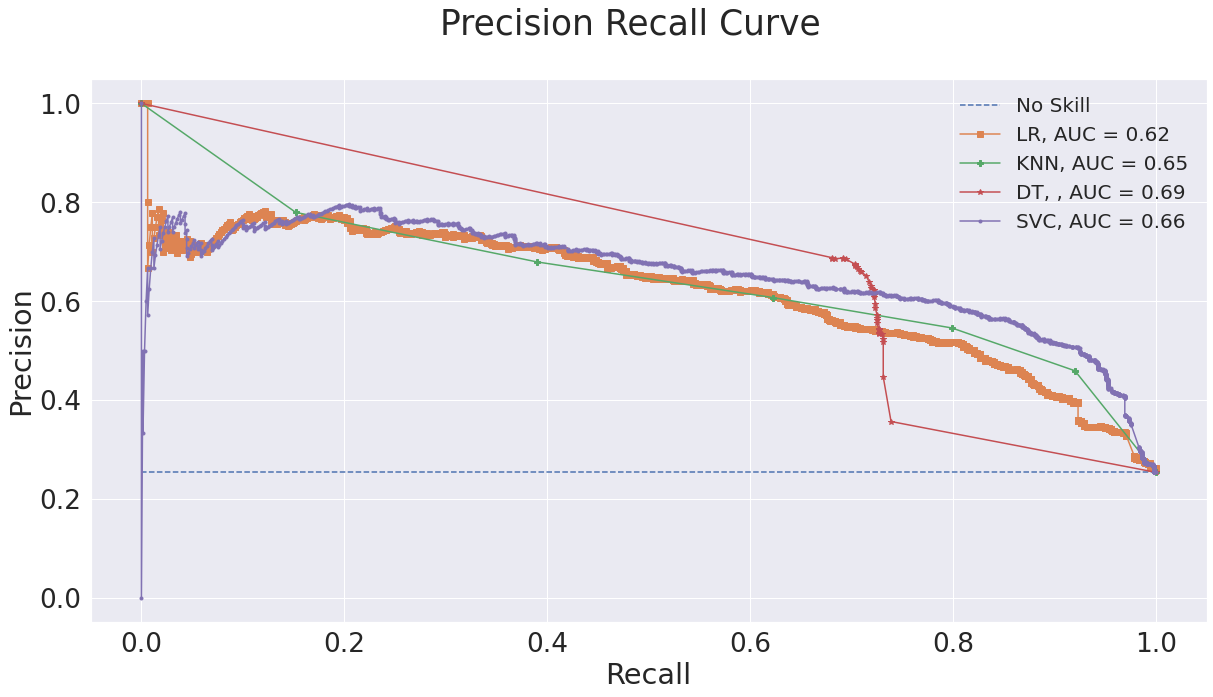

In [ ]:
lr_precision, lr_recall, _ = precision_recall_curve(ytest, y_pred_prob1)
lr_f1, lr_auc = f1_score(ytest, ylr_pred), auc(lr_recall, lr_precision)

knn_precision, knn_recall, _ = precision_recall_curve(ytest, y_pred_prob3)
knn_f1, knn_auc = f1_score(ytest, yknn_pred), auc(knn_recall, knn_precision)

dt_precision, dt_recall, _ = precision_recall_curve(ytest, y_pred_prob4)
dt_f1, dt_auc = f1_score(ytest, ydt_pred), auc(dt_recall, dt_precision)

svc_precision, svc_recall, _ = precision_recall_curve(ytest, y_pred_prob5)
svc_f1, svc_auc = f1_score(ytest, ysvc_pred), auc(svc_recall, svc_precision)

# summarize scores
print('Logistic Regression: f1=%.2f auc=%.2f' % (lr_f1, lr_auc))
print('KNN Classifier: f1=%.2f auc=%.2f' % (knn_f1, knn_auc))
print('Decision Trees: f1=%.2f auc=%.2f' % (dt_f1, dt_auc))
print('SVC: f1=%.2f auc=%.2f' % (svc_f1, svc_auc))

# plot the precision-recall curves
no_skill = len(ytest[ytest==1]) / len(ytest)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='s', label='LR, AUC = %.2f' % lr_auc)
plt.plot(knn_recall, knn_precision, marker='P', label='KNN, AUC = %.2f' % knn_auc)
plt.plot(dt_recall, dt_precision, marker='*', label='DT, , AUC = %.2f' % dt_auc)
plt.plot(svc_recall, svc_precision, marker='.', label='SVC, AUC = %.2f' % svc_auc)

plt.suptitle("Precision Recall Curve")

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# show the legend
plt.legend(loc = 'upper right', fontsize = 20);

- According to precision-recall curve, Decision Trees has performed the best on test/unseen data with AUC = 0.69 and F1 = 0.69

**10-Fold Cross Validation to check the performance on data using important features suggested by the Random Forest Classifier**

LR: 0.792239 (0.024089)
KNN: 0.808594 (0.023292)
DT: 0.834381 (0.016339)
NB: 0.579733 (0.097930)
SVC: 0.799329 (0.022808)


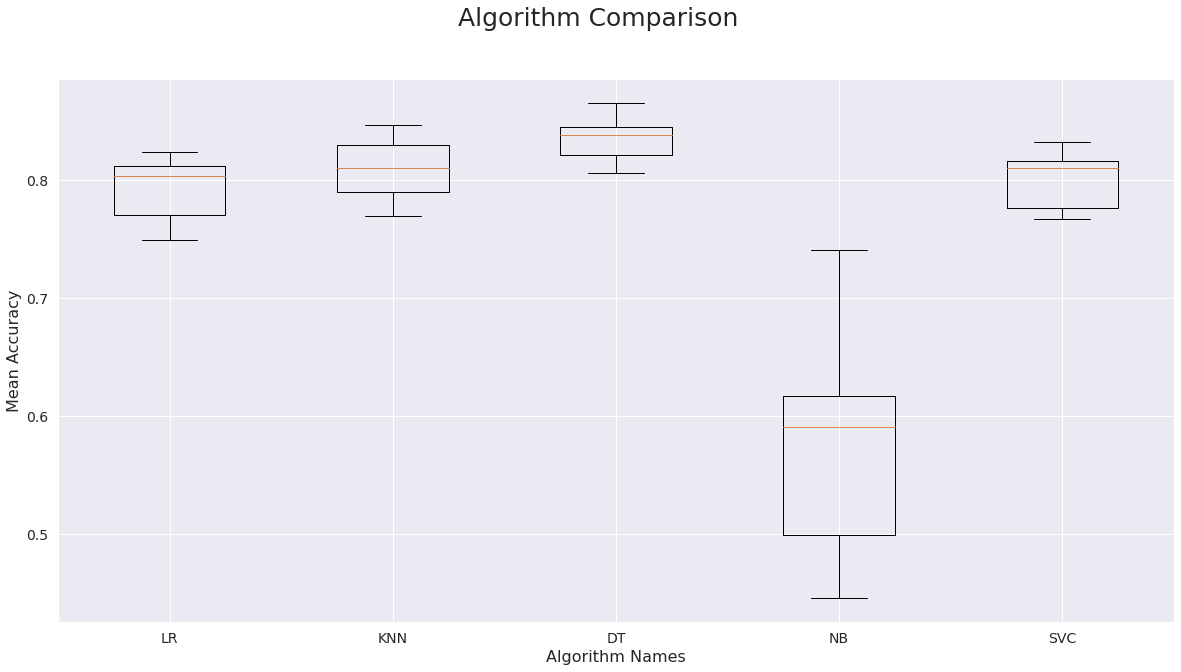

In [ ]:
# Using different models to test accuracy on data
  
seed = 7
X = q2.iloc[:, 0:9].values
Y = q2.iloc[:, 9].values
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed)
  cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison', fontsize = 25)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, fontsize = 14)
ax.set_yticklabels(ax.get_yticks().round(2), fontsize = 14)
ax.set_xlabel("Algorithm Names", fontsize = 16)
ax.set_ylabel("Mean Accuracy", fontsize = 16)
plt.show()

- The above box and whisker plot compares the spread of mean accuracy scores across each fold for multiple algorithms. 
- Cross Validation output aligns with our previous result and suggests that Decision Trees have performed the best among all other classifiers with a mean accuracy of 83.4%

# **Results**

- Because our data is imbalanced we are interested in the skill of our model to predict superhosts (class 1) and ignore the prediction of regular hosts (class 0). 
- Results of ROC AUC Curve can be deceiving which takes into account true negatives into its calculation.
- Therefore, we look at the results of our precision - recall curve that discards true negatives, which suggests that Decision Trees performs the best with AUC = 0.69 and F1 score = 0.69.
- We also performed 10-Fold Cross Validation which suggests the same. The mean accuracy of Decision Trees classifier is 83.4% with Naive Bayes performing the worst with mean accuracy of 57.9%

##  <ins>References</ins>
- [BnbSpecialist Website (2020)](https://www.bnbspecialist.com/airbnb-superhost/)
- [Bnb Host Website](https://bnbhost.co.uk/become-an-airbnb-superhost/)
- [Brownlee, Jason (2018) "How to Use ROC Curves and Precision-Recall Curves for Classification in Python" ](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)
- [Brownlee, Jason (2016) "How To Compare Machine Learning Algorithms in Python with scikit-learn"](https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/)
- [Airbnb Website (2021) "Superhost: Recognizing the best in hospitality"](https://www.airbnb.ca/d/superhost)